In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
shots_df = pd.read_csv('data/19_20_shot_quality.csv')
season_df = pd.read_excel('data/19_20_SEASON_STATS.xlsx')

In [ ]:
merged = pd.merge(shots_df,season_df, on="Team")
merged.sort_values(by=['Team'], inplace=True)

In [ ]:
merged.columns

In [ ]:
x = merged['PTS']
y1 = merged['abovePercent']
m, b = np.polyfit(x,y1,1)
y_pred = m*x+b
r2 = r2_score(y1,y_pred)

In [ ]:
plt.plot(x,y1,'o')
plt.plot(x, y_pred)
plt.xlabel("PTS")
plt.ylabel("PercentAbove")

Text(0.5, 1.0, 'Points vs Percent of shots above')

<Figure size 1440x1440 with 0 Axes>

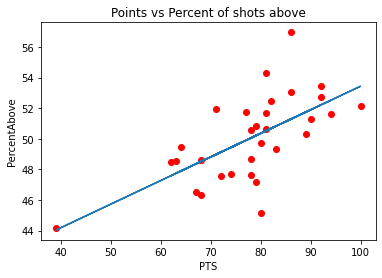

In [38]:
fig = plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.scatter(x,y1,c="red")
ax.plot(x,y_pred)
ax.set_xlabel("PTS")
ax.set_ylabel("PercentAbove")
ax.set_title("Points vs Percent of shots above")